# Plot b_y
The python script to make b_y vs redshift plot, Figure 10 of Chiang et al (2020)

In [1]:
# load modules
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pylab as plt
import numpy as np
from pysz import pysz

In [2]:
# initialize tsz_cl class
tsz = pysz.tsz_cl()

# b_Y and dY/dz calculation
Calculate the Compton-Y weighted halo bias b_y, defined as (eq. 15 of Chiang et al. 2020)
$$
b_y(z) =
\frac{\int {\rm d}M \frac{{\rm d}n}{{\rm d}M} \tilde{y}_{0}(M,z)b_{\rm lin}(M,z)}
{\int {\rm d}M \frac{{\rm d}n}{{\rm d}M} \tilde{y}_{0}(M,z)},
$$
where dn/dM is the dark matter mass function, $b_{\rm lin}$ the linear halo bias, $\tilde{y}_0$ the total Compton-Y from the halo of mass M at redshift z defined as:
$$
\tilde{y}_{0}(M,z) = 
\frac{r_{\rm 500}^3}{D_{\rm A}^2}
\frac{\sigma_{\rm T}}{m_{\rm e} c^2}
\int^{r_{\rm max}}_{0}{\rm d}r\;4\pi r^2 P_{\rm e}(r| M, z).
$$

The code simultaneously calculate the redshift derivative of Compton-Y dy/dz
$$
\frac{{\rm d}y}{{\rm d}z} = \frac{{\rm d}V}{{\rm d}z{\rm d}\Omega} \int_{M_{\rm min}}^{M_{\rm max}} {\rm d}M \frac{{\rm d}n}{{\rm d}M} \tilde{y}_{0}(M,z)
$$

In [17]:
# Calculate the b_Y and dY/dz, defined in Chiang et al. (2020)
# set cosmological parameters and mass bias
pars = {'h0':0.6737, 'obh2':0.02233,'och2':0.1198,\
        'As':2.097e-9,'ns':0.9652,'mnu':0.06,\
        'flag_nu':True, 'mass_bias':1.27}
# if flag_nu = True, the code use the cdm+baryon power spectrum in the calculation
# instread of the total matter power spectrum. 
# See Sec 4 of Chiang et al. (2020)

# Set the array of redshifts at which b_Y and dY/dz calculated
zarr = np.logspace(np.log10(1e-2),np.log10(4.5),100)

# Calculate b_Y and dY/dz
by, dydz = tsz.get_by_dydz(zarr,pars,Mmin=1e11,Mmax=5e15)

/Users/ryu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


Text(0, 0.5, '$b_y$')

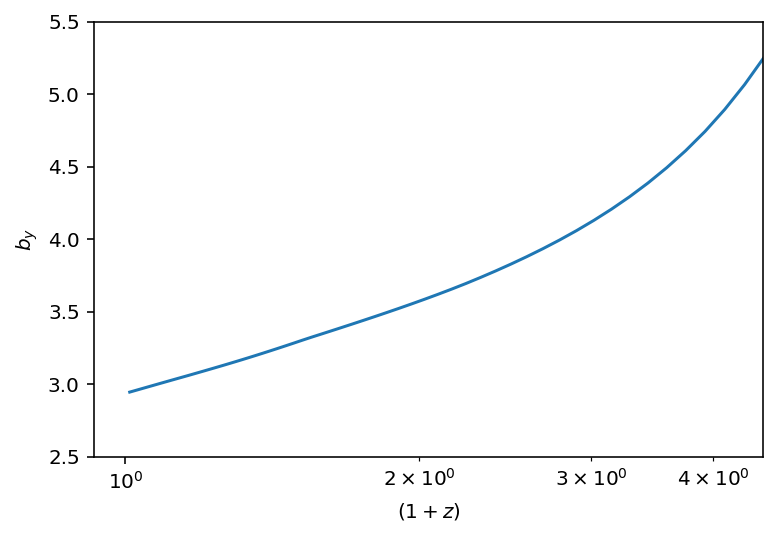

In [19]:
# plot
plt.plot(zarr+1,by)
plt.xscale('log')
plt.xlim(0.0,4.5)
plt.ylim(2.5,5.5)
plt.xlabel(r'$(1+z)$')
plt.ylabel(r'$b_y$')